In [1]:
!pip install --upgrade pip

In [2]:
import sys
sys.version

'3.8.12 (default, Oct 12 2021, 03:01:40) [MSC v.1916 64 bit (AMD64)]'

In [3]:
!pip install JPype1-1.1.2-cp38-cp38-win_amd64.whl

Processing c:\users\smhrd\documents\머신러닝\jpype1-1.1.2-cp38-cp38-win_amd64.whl
JPype1 is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.


In [4]:
!pip install konlpy

In [5]:
#한글 형태소 분류기 
from konlpy.tag import Okt, Kkma

In [6]:
okt = Okt()
okt.morphs('아버지가방에들어가신다')

['아버지', '가방', '에', '들어가신다']

In [7]:
kkma = Kkma()
kkma.morphs('아버지가방에들어가신다')

['아버지', '가방', '에', '들어가', '시', 'ㄴ다']

In [8]:
text = '아버지가방에들어가신다'
okt.pos(text) # 어떤 형태소인지 분류해서 대상을 알려줌

[('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가신다', 'Verb')]

In [9]:
kkma.pos(text)

[('아버지', 'NNG'),
 ('가방', 'NNG'),
 ('에', 'JKM'),
 ('들어가', 'VV'),
 ('시', 'EPH'),
 ('ㄴ다', 'EFN')]

In [10]:
okt.tagset #분류할 수 있는 형태소를 나열 

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [11]:
okt.nouns(text) #명사만 추출

['아버지', '가방']

In [12]:
!pip install sklearn numpy pandas matplotlib

In [13]:
#countvectorizer 와 연결해서 사용하기(BOW)
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [14]:
text = ['천혜향 맛있어', '오늘 점심 뭐먹지', 
       '자고싶다']

In [15]:
cv.fit(text) # 토큰화 및 단어사전 구축 

CountVectorizer()

In [16]:
cv.vocabulary_ # 띄어쓰기 단위로 토큰화 

{'천혜향': 5, '맛있어': 0, '오늘': 2, '점심': 4, '뭐먹지': 1, '자고싶다': 3}

In [17]:
def mytoken(text):
    return okt.nouns(text)

In [18]:
cv_okt = CountVectorizer(tokenizer = mytoken)

In [19]:
cv_okt.fit(text)

C:\Users\smhrd\anaconda3\envs\test\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


CountVectorizer(tokenizer=<function mytoken at 0x000002BD4E909C10>)

In [20]:
cv_okt.vocabulary_

{'천혜향': 3, '오늘': 1, '점심': 2, '뭐': 0}

In [21]:
import pandas as pd

# 문제정의
- 한글 영화 리뷰 데이터셋으로 감성부넉을 진행
- kolnpy를 사용해서 형태소 분류 

# 테이터 수집 

In [22]:
text_train = pd.read_csv('./data/ratings_train.txt', delimiter = '\t')
text_test = pd.read_csv('./data/ratings_test.txt', delimiter = '\t')

In [23]:
text_train.shape

(150000, 3)

In [24]:
text_test.shape

(50000, 3)

In [25]:
text_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [26]:
text_train.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


# 데이터 전처리 

In [27]:
text_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


## 결측치 삭제 
- 결측치 삭제~~


In [28]:
text_train.dropna(inplace= True)
text_test.dropna(inplace=True)

In [29]:
X_train = text_train['document'][:10000]
y_train = text_train['label'][:10000]
X_test = text_test['document'][:1000]
y_test = text_test['label'][:1000]

## 토큰화


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
def mytoken(text): #토큰화 방법 정의 함수
    return okt.nouns(text)

In [32]:
tf_okt = TfidfVectorizer(tokenizer = mytoken)

In [33]:
cv_okt = CountVectorizer( tokenizer = mytoken)

In [34]:
tf_okt.fit(X_train)

C:\Users\smhrd\anaconda3\envs\test\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TfidfVectorizer(tokenizer=<function mytoken at 0x000002BD4E80FE50>)

In [35]:
cv_okt.fit(X_train) #토큰화 및 단어사전 구축 

CountVectorizer(tokenizer=<function mytoken at 0x000002BD4E80FE50>)

In [36]:
len(cv_okt.vocabulary_)

10089

In [37]:
# 수치화
X_train_okt = cv_okt.transform(X_train)
X_test_okt = cv_okt.transform(X_test)

In [42]:
X_train_okt.toarray()[1][:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [44]:
X_train_okt_tf = tf_okt.transform(X_train)

## 파이프라인
- BOW, LinearRegression
- 3,4,5,6 단계가 한번에 진행

In [39]:
from sklearn.pipeline import make_pipeline

### 토큰화, 수치화, 모델학습

In [40]:
pipe_model = make_pipeline(CountVectorizer(tokenizer = mytoken),
                          LogisticRegression())

NameError: name 'LogisticRegression' is not defined

In [45]:
pipe_model.fit(X_train,y_train) #countvectorizer 하기 전에 데이터를 넣어줘야한다.

NameError: name 'pipe_model' is not defined

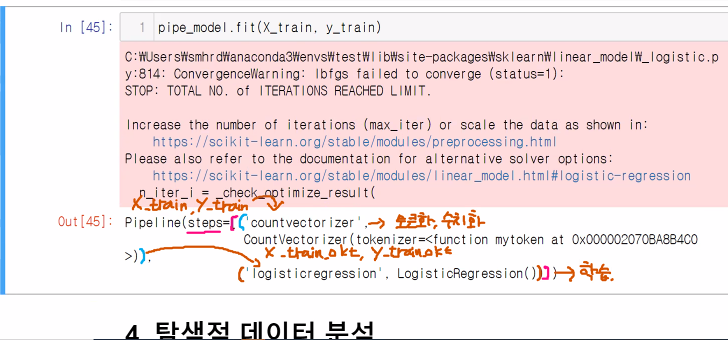

### 결과확인

In [ ]:
# score 확인
pipe_model.score(X_test, y_test)

In [ ]:
pipe_model.steps

In [ ]:
pipe_cv = pipe_model.steps[0][1]

In [ ]:
voca = pipe_cv.vocabulary_

In [ ]:
pipe_lr = pipe_model.steps[1][1]

In [ ]:
word_weight = pipe_lr.coef_

### GridSearch 

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# gridSerch 를 위한 변수 지정 
param_grid = {
    'countvectorizer__max_df' : [100,200,300],
    'countvectorizer__min_df' : [10,20,30],
    'countvectorizer__ngram_range' : [(1,1), (1,2), (1,3)],
    'logisticregression__C' : [0.01, 0.1 , 1, 10, 100]
}

In [ ]:
grid = GridSearchCV(pipe_model, param_grid, cv = 5)

In [ ]:
grid.fit(X_train, y_train)

In [ ]:
# 가장 결과가 좋은 파라미터
grid.best_params_

In [ ]:
# 가장 좋은 결과
grid.best_score

In [ ]:
final_pipe_model = make_pipeline(CountVectorizer(max_df = ,
                                                min_df = ,
                                                ngram_range = ),
                                LinearRegression(C=)
                                )
final_pipe_model.fit(X_train, y_train)

# 탐색적 데이터 분석 

# 모델 선택 및 하이퍼 파라미터 튜닝

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_model = LogisticRegression()

# 학습

In [ ]:
lr_model.fit(X_train_okt, y_train)

# 평가

In [ ]:
lr_model.score(X_train_okt, y_train)

In [ ]:
lr_model.score(X_test_okt, y_test)

# 감성분석 

In [ ]:
voca = cv_okt.vocabulary_ # 단어사전
word_weight = lr_model.coef_ # 단어가 가지고있는 가중치

In [ ]:
df = pd.DataFrame([voca.keys(),
                  voca.values()])
df = df.T
df_sorted = df.sort_values(by = 1)
df_sorted['coef'] = word_weight.reshape(-1)
df_sorted.sort_values(by ='coef' , inplace = True)
top30_df = pd.concat([
    df_sorted.head(30),
    df_sorted.tail(30)
])

In [ ]:
import matplotlib.pyplot as plt
import matplotlib

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\Windows\Fonts\malgun.ttf").get_name()
rc('font',family=font_name)

matplotlib.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(15,5)) # 가로,세로 비율
plt.bar(top30_df[0], top30_df['coef']) # x축은 단어, y축은 가중치
plt.xticks(rotation = 90) # x축 눈금 각도 조정
plt.show()

voca = cv_okt.vocabulary_ # 단어사전
word_weight = lr_model.coef_ # 단어가 가지고있는 가중치

df = pd.DataFrame([voca.keys(),
                  voca.values()]) # voca 데이터를 데이터 프레임으로 변환

df = df.T # 행과 열을 전치해서 변환
df_sorted = df.sort_values(by = 1) # 단어사전 index 순서대로 정렬
df_sorted['coef'] = word_weight.reshape(-1) # 가중치를 데이터프레임에 추가
df_sorted.sort_values(by ='coef' , inplace = True) # 가중치를 기준으로 정렬
top30_df = pd.concat([
    df_sorted.head(30), # 가중치가 높은 30개
    df_sorted.tail(30) # 가중치가 낮은 30개
])

import matplotlib.pyplot as plt
import matplotlib

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\Windows\Fonts\malgun.ttf").get_name()
rc('font',family=font_name) # 한글을 지원하는 폰트로 변경

matplotlib.rcParams['axes.unicode_minus'] = False # -값 표현

plt.figure(figsize=(15,5)) # 가로,세로 비율
plt.bar(top30_df[0], top30_df['coef']) # x축은 단어, y축은 가중치
plt.xticks(rotation = 90) # x축 눈금 각도 조정
plt.show()